extract Sterimol values for each quadrant (Q1, Q2, Q3, Q4) of molecules, compute the average Sterimol values for hydrogen atoms, and replace missing values with these averages 

In [7]:
import molli as ml
import pandas as pd
import numpy as np

mlib_ster = ml.MoleculeLibrary('/Users/zhangjiayi/Desktop/Chem Research/molli/Practice/4_DB_OPT_Sterimol.mlib')

data = []
hydrogen_b1_values = []
hydrogen_b5_values = []
hydrogen_l_values = []

with mlib_ster.reading():
    for molecule_id in mlib_ster.keys():
        molecule = mlib_ster[molecule_id]
        
        sterimol_data = molecule.attrib.get('All Arb Sterimol', {})

        arb_c0_con = molecule.attrib.get('Arb C0 Con', ())
        arb_c1_con = molecule.attrib.get('Arb C1 Con', ())

        quadrant_mapping = {
            'Q1': arb_c0_con[0] if len(arb_c0_con) > 0 else None,
            'Q2': arb_c0_con[1] if len(arb_c0_con) > 1 else None,
            'Q3': arb_c1_con[0] if len(arb_c1_con) > 0 else None,
            'Q4': arb_c1_con[1] if len(arb_c1_con) > 1 else None
        }

        molecule_data = {'Molecule' : molecule_id}

        # Initialize quadrant values with NaN to avoid KeyError
        for quadrant in ['Q1', 'Q2', 'Q3', 'Q4']:
            molecule_data[f'{quadrant}_B1'] = np.nan
            molecule_data[f'{quadrant}_B5'] = np.nan
            molecule_data[f'{quadrant}_L'] = np.nan

        for quadrant, atom_index in quadrant_mapping.items():
            if atom_index is not None:
                atom = molecule.get_atom(atom_index)
                if str(atom_index) in sterimol_data:
                    sterimol_values = sterimol_data[str(atom_index)]
                    if atom.element == ml.Element.H:
                        hydrogen_b1_values.append(sterimol_values.get('b1', np.nan))
                        hydrogen_b5_values.append(sterimol_values.get('b5', np.nan))
                        hydrogen_l_values.append(sterimol_values.get('l', np.nan))
                    else: 
                        molecule_data[f'{quadrant}_B1'] = sterimol_values.get('b1', np.nan)
                        molecule_data[f'{quadrant}_B5'] = sterimol_values.get('b5', np.nan)
                        molecule_data[f'{quadrant}_L'] = sterimol_values.get('l', np.nan)

        data.append(molecule_data)

# Calculate the mean of the hydrogen Sterimol values
mean_hydrogen_b1 = np.nanmean(hydrogen_b1_values)
mean_hydrogen_b5 = np.nanmean(hydrogen_b5_values)
mean_hydrogen_l = np.nanmean(hydrogen_l_values)

# Replace all NaN values with the calculated hydrogen means
for molecule_data in data:
    for quadrant in ['Q1', 'Q2', 'Q3', 'Q4']:
        if np.isnan(molecule_data[f'{quadrant}_B1']):
             molecule_data[f'{quadrant}_B1'] = mean_hydrogen_b1
        if np.isnan(molecule_data[f'{quadrant}_B5']):
            molecule_data[f'{quadrant}_B5'] = mean_hydrogen_b5
        if np.isnan(molecule_data[f'{quadrant}_L']):
            molecule_data[f'{quadrant}_L'] = mean_hydrogen_l

# Convert the list to a Pandas DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
df.to_excel('sterimol_quadrant_values_with_hydrogen_means.xlsx', index=False)

print("Dataset has been generated and saved as 'sterimol_quadrant_values_with_hydrogen_means.xlsx'.")


Dataset has been generated and saved as 'sterimol_quadrant_values_with_hydrogen_means.xlsx'.


Calculate Sterimol Value for quadrant only include hydrogen atom

In [80]:
import molli as ml
import pandas as pd
import numpy as np

# Load the molecular library with stored Sterimol values
mlib_ster = ml.MoleculeLibrary('/Users/zhangjiayi/Desktop/Chem Research/molli/Practice/4_DB_OPT_Sterimol.mlib')

# Initialize an empty list to store the data
data = []

# Access all molecules in the library
with mlib_ster.reading():
    for molecule_id in mlib_ster.keys():
        molecule = mlib_ster[molecule_id]
        
        # Get the Sterimol values stored in the 'All Arb Sterimol' attribute
        sterimol_data = molecule.attrib.get('All Arb Sterimol', {})

        # Get the connections to Arb C0 and C1
        arb_c0_con = molecule.attrib.get('Arb C0 Con', ())
        arb_c1_con = molecule.attrib.get('Arb C1 Con', ())

        # Map atom indices to quadrants
        quadrant_mapping = {
            'Q1': arb_c0_con[0] if len(arb_c0_con) > 0 else None,
            'Q2': arb_c0_con[1] if len(arb_c0_con) > 1 else None,
            'Q3': arb_c1_con[0] if len(arb_c1_con) > 0 else None,
            'Q4': arb_c1_con[1] if len(arb_c1_con) > 1 else None
        }

        # Dictionary to store the Sterimol values for this molecule
        molecule_data = {'Molecule': molecule_id}

        # Extract Sterimol values for hydrogen atoms in each quadrant
        for quadrant, atom_index in quadrant_mapping.items():
            if atom_index is not None:
                atom = molecule.get_atom(atom_index)
                if atom.element == ml.Element.H and str(atom_index) in sterimol_data:
                    sterimol_values = sterimol_data[str(atom_index)]
                    molecule_data[f'{quadrant}_B1'] = sterimol_values.get('b1', np.nan)
                    molecule_data[f'{quadrant}_B5'] = sterimol_values.get('b5', np.nan)
                    molecule_data[f'{quadrant}_L'] = sterimol_values.get('l', np.nan)
                else:
                    # If the atom is not hydrogen or no data, fill with NaN
                    molecule_data[f'{quadrant}_B1'] = np.nan
                    molecule_data[f'{quadrant}_B5'] = np.nan
                    molecule_data[f'{quadrant}_L'] = np.nan
            else:
                # If no atom index is available, fill with NaN
                molecule_data[f'{quadrant}_B1'] = np.nan
                molecule_data[f'{quadrant}_B5'] = np.nan
                molecule_data[f'{quadrant}_L'] = np.nan
        
        # Append the molecule's data to the list
        data.append(molecule_data)

# Convert the list to a Pandas DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
df.to_excel('sterimol_quadrant_values_hydrogen_only.xlsx', index=False)

print("Dataset has been generated and saved as 'sterimol_quadrant_values_hydrogen_only.xlsx'.")



Dataset has been generated and saved as 'sterimol_quadrant_values_hydrogen_only.xlsx'.


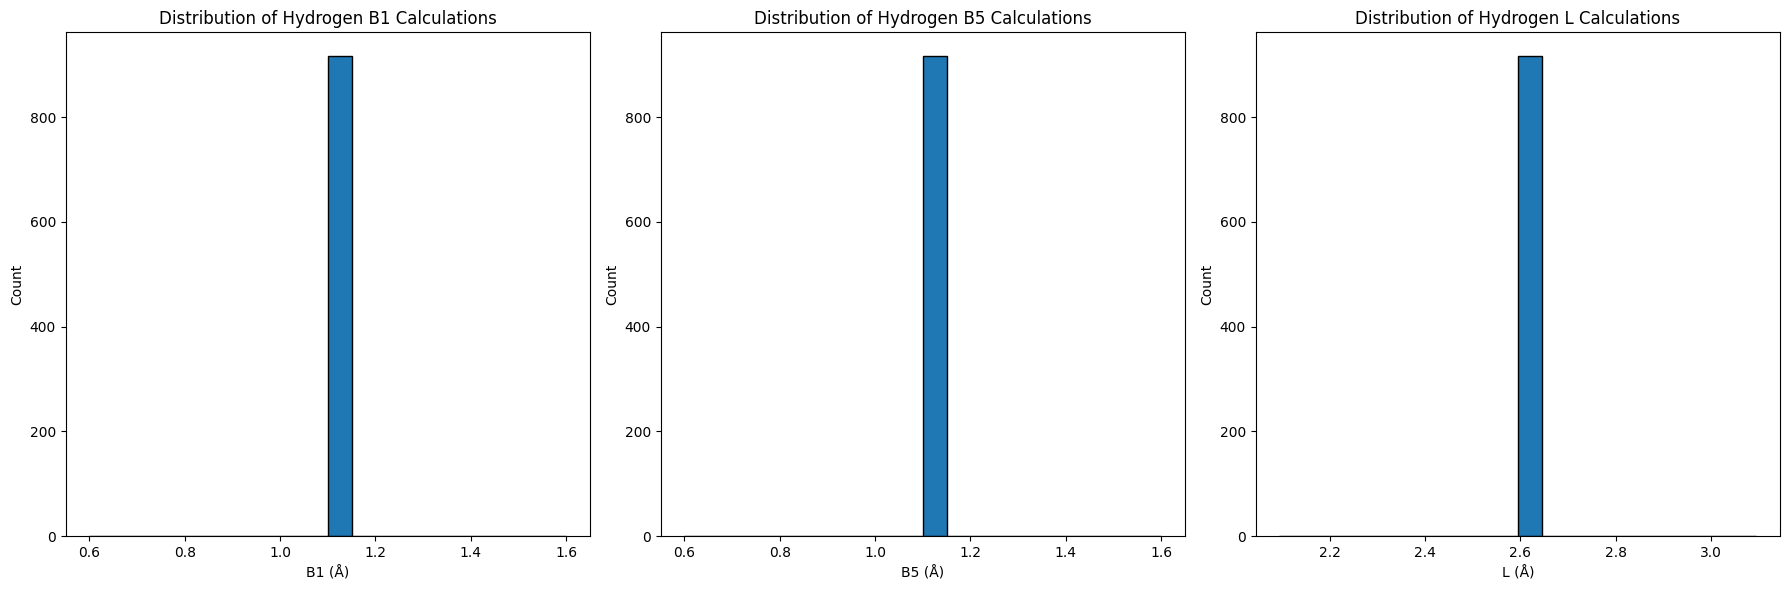

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('sterimol_quadrant_values_hydrogen_only.xlsx')

# Combine Sterimol values from all quadrants
all_b1 = pd.concat([df['Q1_B1'], df['Q2_B1'], df['Q3_B1'], df['Q4_B1']], ignore_index=True)
all_b5 = pd.concat([df['Q1_B5'], df['Q2_B5'], df['Q3_B5'], df['Q4_B5']], ignore_index=True)
all_l = pd.concat([df['Q1_L'], df['Q2_L'], df['Q3_L'], df['Q4_L']], ignore_index=True)

# Plot the distributions
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(all_b1.dropna(), bins=20, edgecolor='black')
plt.title('Distribution of Hydrogen B1 Calculations')
plt.xlabel('B1 (Å)')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(all_b5.dropna(), bins=20, edgecolor='black')
plt.title('Distribution of Hydrogen B5 Calculations')
plt.xlabel('B5 (Å)')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(all_l.dropna(), bins=20, edgecolor='black')
plt.title('Distribution of Hydrogen L Calculations')
plt.xlabel('L (Å)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


store the charge of all of the atoms in different quadrant but replace the charge of the hydrogen with the mean of all hydrogen charges

In [16]:
import pandas as pd
import molli as ml
import numpy as np

# Define the paths to the molecular libraries
aligned_molecule_library_path = '/Users/zhangjiayi/Desktop/Chem Research/molli/Practice/4_DB_OPT_AlignVol.mlib'
charged_molecule_library_path = '/Users/zhangjiayi/Desktop/Chem Research/molli/Practice/alkene/processed_molecules.mlib'

# Load the MoleculeLibraries
aligned_mlib = ml.MoleculeLibrary(aligned_molecule_library_path)
charged_mlib = ml.MoleculeLibrary(charged_molecule_library_path)

# Initialize a dictionary to store the data for the DataFrame
data = {
    "Molecule": [],
    "Q1_charge": [],
    "Q2_charge": [],
    "Q3_charge": [],
    "Q4_charge": [],
    "C1_charge": [],
    "C2_charge": []
}

# Initialize a list to collect hydrogen charges
hydrogen_charges = []

# Iterate through each molecule in the aligned library
with aligned_mlib.reading(), charged_mlib.reading():
    for k in aligned_mlib:
        aligned_m = aligned_mlib[k]
        charged_m = charged_mlib.get(k, None)

        if charged_m is None:
            print(f"Warning: Molecule {k} not found in the charged library.")
            continue
        
        # Check if 'Q Order' and 'C Order' exist
        if 'Q Order' not in aligned_m.attrib or 'C Order' not in aligned_m.attrib:
            print(f"Warning: Molecule {k} is missing 'Q Order' or 'C Order'.")
            continue
        
        # Extract the atom indices for Q1, Q2, Q3, Q4, C1, and C2
        q1_index = aligned_m.attrib['Q Order'][0]
        q2_index = aligned_m.attrib['Q Order'][1]
        q3_index = aligned_m.attrib['Q Order'][2]
        q4_index = aligned_m.attrib['Q Order'][3]
        c1_index = aligned_m.attrib['C Order'][0]
        c2_index = aligned_m.attrib['C Order'][1]
        
        # Extract the corresponding atoms from the charged molecule
        q1_atom = charged_m.get_atom(q1_index)
        q2_atom = charged_m.get_atom(q2_index)
        q3_atom = charged_m.get_atom(q3_index)
        q4_atom = charged_m.get_atom(q4_index)
        c1_atom = charged_m.get_atom(c1_index)
        c2_atom = charged_m.get_atom(c2_index)
        
        # Check if the atoms are hydrogen and collect charges
        q1_charge = q1_atom.attrib.get('charge', None)
        if q1_atom.element == ml.Element.H and q1_charge is not None:
            hydrogen_charges.append(float(q1_charge))
        
        q2_charge = q2_atom.attrib.get('charge', None)
        if q2_atom.element == ml.Element.H and q2_charge is not None:
            hydrogen_charges.append(float(q2_charge))
        
        q3_charge = q3_atom.attrib.get('charge', None)
        if q3_atom.element == ml.Element.H and q3_charge is not None:
            hydrogen_charges.append(float(q3_charge))
        
        q4_charge = q4_atom.attrib.get('charge', None)
        if q4_atom.element == ml.Element.H and q4_charge is not None:
            hydrogen_charges.append(float(q4_charge))

        # Append the charges to the data dictionary
        data["Molecule"].append(k)
        data["Q1_charge"].append(q1_charge)
        data["Q2_charge"].append(q2_charge)
        data["Q3_charge"].append(q3_charge)
        data["Q4_charge"].append(q4_charge)
        data["C1_charge"].append(c1_atom.attrib.get('charge', None))
        data["C2_charge"].append(c2_atom.attrib.get('charge', None))

# Calculate the mean hydrogen charge (ignoring None values)
mean_hydrogen_charge = np.mean([charge for charge in hydrogen_charges if charge is not None])

# Replace hydrogen atom charges with the mean hydrogen charge
for i in range(len(data["Molecule"])):
    if data["Q1_charge"][i] is not None and q1_atom.element == ml.Element.H:
        data["Q1_charge"][i] = mean_hydrogen_charge
    if data["Q2_charge"][i] is not None and q2_atom.element == ml.Element.H:
        data["Q2_charge"][i] = mean_hydrogen_charge
    if data["Q3_charge"][i] is not None and q3_atom.element == ml.Element.H:
        data["Q3_charge"][i] = mean_hydrogen_charge
    if data["Q4_charge"][i] is not None and q4_atom.element == ml.Element.H:
        data["Q4_charge"][i] = mean_hydrogen_charge

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
output_path = '/Users/zhangjiayi/Desktop/Chem Research/molli/Practice/machine_learning/molecule_charges_mean_replaced.xlsx'
df.to_excel(output_path, index=False)

# Display the DataFrame
print(df)


       Molecule Q1_charge Q2_charge Q3_charge  Q4_charge C1_charge C2_charge
0     react_444     0.987     0.007     0.023   0.063919    -0.134     0.019
1    react_2190     0.508     0.345     0.051   0.063919    -0.072    -0.075
2    react_2163     0.461    -0.001     0.051   0.063919    -0.005    -0.041
3     react_830     0.026    -0.252     0.342   0.063919     0.084     0.067
4    react_1546    -0.305    -0.149     0.016   0.063919     0.082     0.051
..          ...       ...       ...       ...        ...       ...       ...
916     react_0     0.260     0.067    -0.105   0.063919    -0.031    -0.022
917  react_1340     0.095     0.064     0.041   0.063919     0.003    -0.079
918   react_246     0.342    -0.151     0.025   0.063919     0.064     0.088
919  react_2449     0.032     0.036    -0.099   0.063919     0.060    -0.076
920  react_1988     0.350    -0.152    -0.062   0.063919    -0.122     0.101

[921 rows x 7 columns]


generate the dataframe of hydrogen charge only

In [12]:
import pandas as pd
import molli as ml

# Define the paths to the molecular libraries
aligned_molecule_library_path = '/Users/zhangjiayi/Desktop/Chem Research/molli/Practice/4_DB_OPT_AlignVol.mlib'
charged_molecule_library_path = '/Users/zhangjiayi/Desktop/Chem Research/molli/Practice/alkene/processed_molecules.mlib'

# Load the MoleculeLibraries
aligned_mlib = ml.MoleculeLibrary(aligned_molecule_library_path)
charged_mlib = ml.MoleculeLibrary(charged_molecule_library_path)

# Initialize a dictionary to store the data for the DataFrame
data = {
    "Molecule": [],
    "Q1_H_charge": [],
    "Q2_H_charge": [],
    "Q3_H_charge": [],
    "Q4_H_charge": [],
    "C1_charge": [],
    "C2_charge": []
}

# Iterate through each molecule in the aligned library
with aligned_mlib.reading(), charged_mlib.reading():
    for k in aligned_mlib:
        aligned_m = aligned_mlib[k]
        charged_m = charged_mlib.get(k, None)

        if charged_m is None:
            print(f"Warning: Molecule {k} not found in the charged library.")
            continue
        
        # Check if 'Q Order' and 'C Order' exist
        if 'Q Order' not in aligned_m.attrib or 'C Order' not in aligned_m.attrib:
            print(f"Warning: Molecule {k} is missing 'Q Order' or 'C Order'.")
            continue
        
        # Extract the atom indices for Q1, Q2, Q3, Q4, C1, and C2
        q1_index = aligned_m.attrib['Q Order'][0]
        q2_index = aligned_m.attrib['Q Order'][1]
        q3_index = aligned_m.attrib['Q Order'][2]
        q4_index = aligned_m.attrib['Q Order'][3]
        c1_index = aligned_m.attrib['C Order'][0]
        c2_index = aligned_m.attrib['C Order'][1]
        
        # Extract the corresponding atoms from the charged molecule
        q1_atom = charged_m.get_atom(q1_index)
        q2_atom = charged_m.get_atom(q2_index)
        q3_atom = charged_m.get_atom(q3_index)
        q4_atom = charged_m.get_atom(q4_index)
        c1_atom = charged_m.get_atom(c1_index)
        c2_atom = charged_m.get_atom(c2_index)
        
        # Initialize variables to store hydrogen charges
        q1_h_charge = q2_h_charge = q3_h_charge = q4_h_charge = None
        
        # Check if the atom is hydrogen and append its charge to the correct quadrant
        if q1_atom.element == ml.Element.H:
            q1_h_charge = q1_atom.attrib.get('charge', None)
        if q2_atom.element == ml.Element.H:
            q2_h_charge = q2_atom.attrib.get('charge', None)
        if q3_atom.element == ml.Element.H:
            q3_h_charge = q3_atom.attrib.get('charge', None)
        if q4_atom.element == ml.Element.H:
            q4_h_charge = q4_atom.attrib.get('charge', None)

        # Append the charges to the data dictionary
        data["Molecule"].append(k)
        data["Q1_H_charge"].append(q1_h_charge)
        data["Q2_H_charge"].append(q2_h_charge)
        data["Q3_H_charge"].append(q3_h_charge)
        data["Q4_H_charge"].append(q4_h_charge)
        data["C1_charge"].append(c1_atom.attrib.get('charge', None))
        data["C2_charge"].append(c2_atom.attrib.get('charge', None))

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

output_path = '/Users/zhangjiayi/Desktop/Chem Research/molli/Practice/molecule_hydrogen_charges.xlsx'
df.to_excel(output_path, index=False)
# Display the DataFrame
print(df)


       Molecule Q1_H_charge Q2_H_charge Q3_H_charge Q4_H_charge C1_charge  \
0     react_444        None        None        None       0.080    -0.134   
1    react_2190        None        None       0.051        None    -0.072   
2    react_2163        None        None       0.051        None    -0.005   
3     react_830        None        None        None        None     0.084   
4    react_1546        None        None        None        None     0.082   
..          ...         ...         ...         ...         ...       ...   
916     react_0        None       0.067        None        None    -0.031   
917  react_1340        None       0.064       0.041        None     0.003   
918   react_246        None        None        None        None     0.064   
919  react_2449        None       0.036        None        None     0.060   
920  react_1988        None        None        None       0.063    -0.122   

    C2_charge  
0       0.019  
1      -0.075  
2      -0.041  
3       0.0

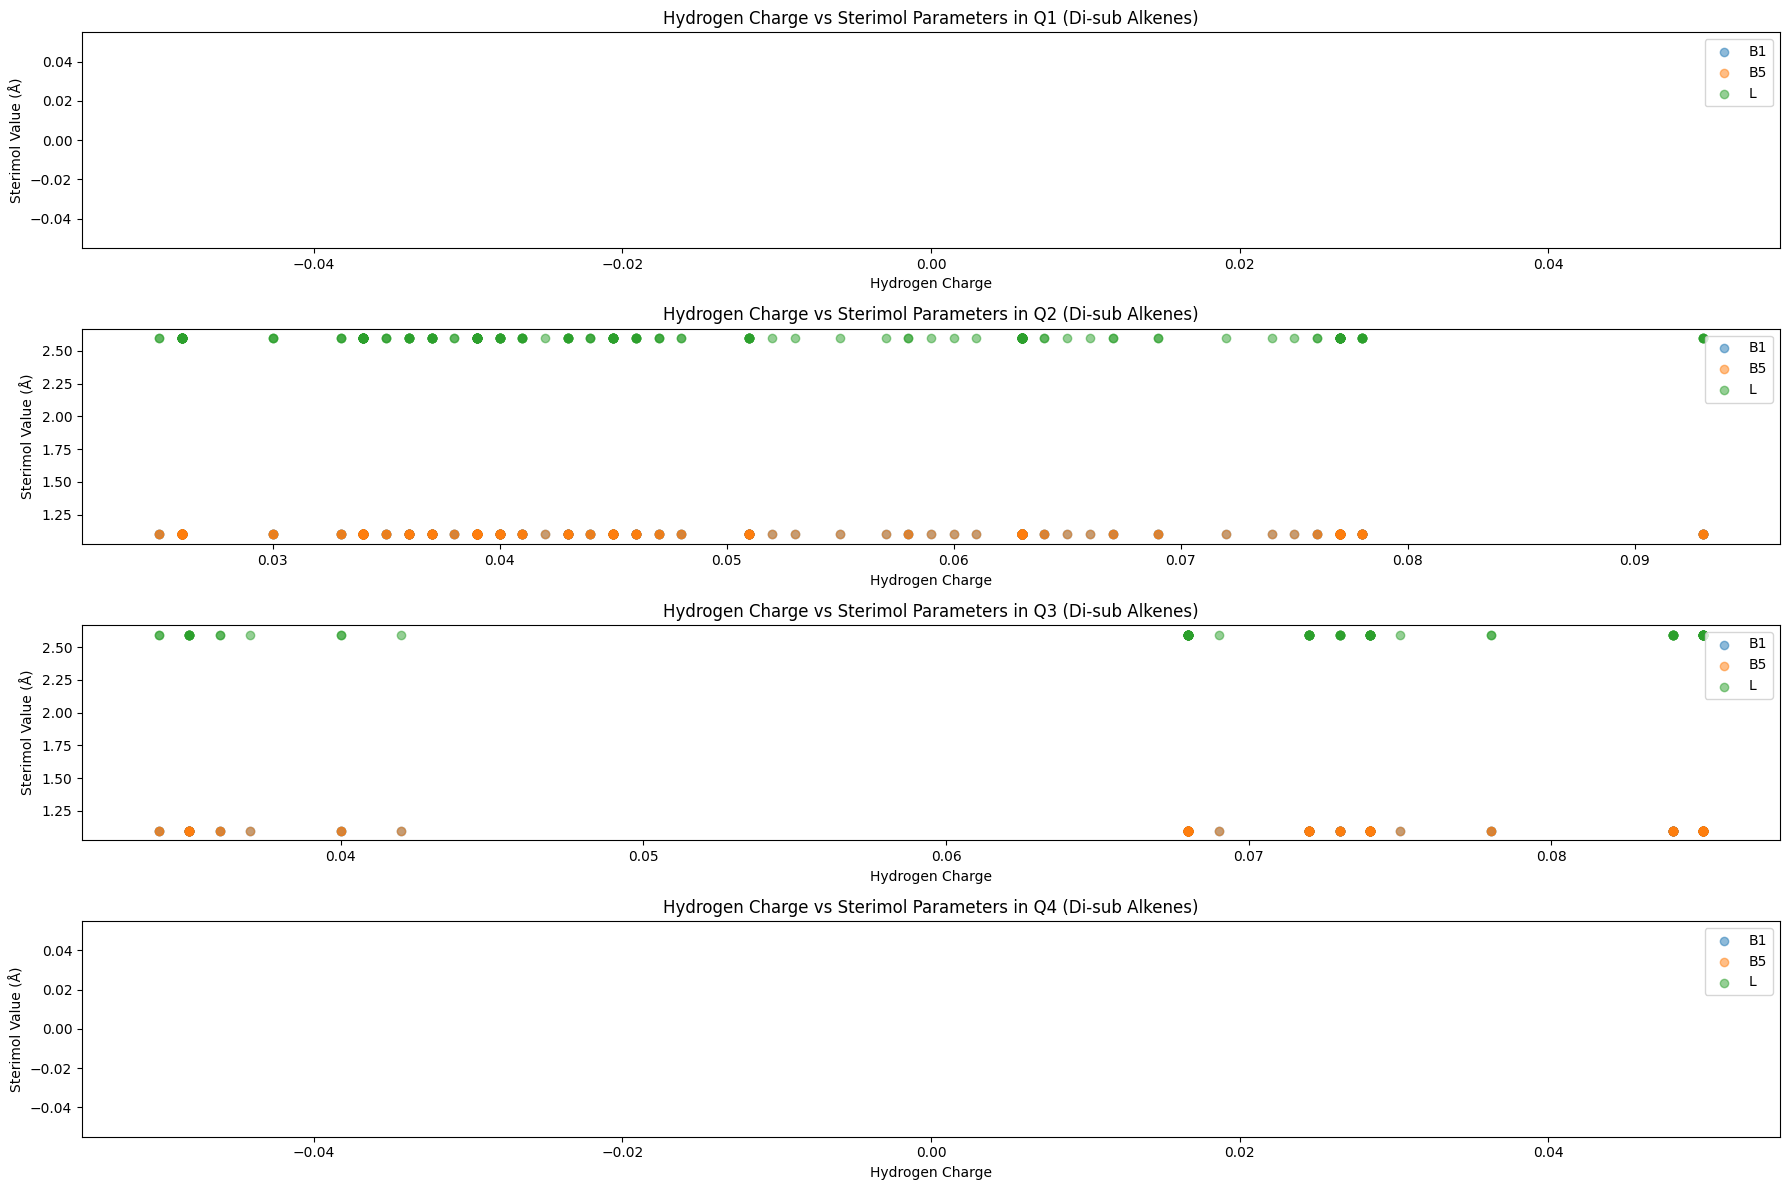

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel files
sterimol_df = pd.read_excel('sterimol_quadrant_values_hydrogen_only.xlsx')
charges_df = pd.read_excel('/Users/zhangjiayi/Desktop/Chem Research/molli/Practice/molecule_hydrogen_charges.xlsx')
type_df = pd.read_excel('/Users/zhangjiayi/Desktop/Chem Research/molli/Practice/machine_learning/reordered_final_merged_cleaned_qqm_molecule_charges.xlsx')

# Merge the sterimol and charges dataframes on 'Molecule'
combined_df = pd.merge(sterimol_df, charges_df, on='Molecule')

# Merge with the type_df to include alkene type information
combined_df = pd.merge(combined_df, type_df[['Reactant ID', '_Alkene_Type']], left_on='Molecule', right_on='Reactant ID')

# Filter to only include Di-sub alkenes
di_sub_df = combined_df[combined_df['_Alkene_Type'] == 'Di-sub']

# Plot the distributions of hydrogen charges across quadrants
plt.figure(figsize=(18, 12))

quadrants = ['Q1', 'Q2', 'Q3', 'Q4']

for i, quadrant in enumerate(quadrants):
    plt.subplot(4, 1, i + 1)
    
    for sterimol_param in ['B1', 'B5', 'L']:
        plt.scatter(di_sub_df[f'{quadrant}_H_charge'], di_sub_df[f'{quadrant}_{sterimol_param}'], label=f'{sterimol_param}', alpha=0.5)
    
    plt.title(f'Hydrogen Charge vs Sterimol Parameters in {quadrant} (Di-sub Alkenes)')
    plt.xlabel('Hydrogen Charge')
    plt.ylabel('Sterimol Value (Å)')
    plt.legend()

plt.tight_layout()
plt.show()


Distrubution of charge with the hydrogen sterimol descriptor 

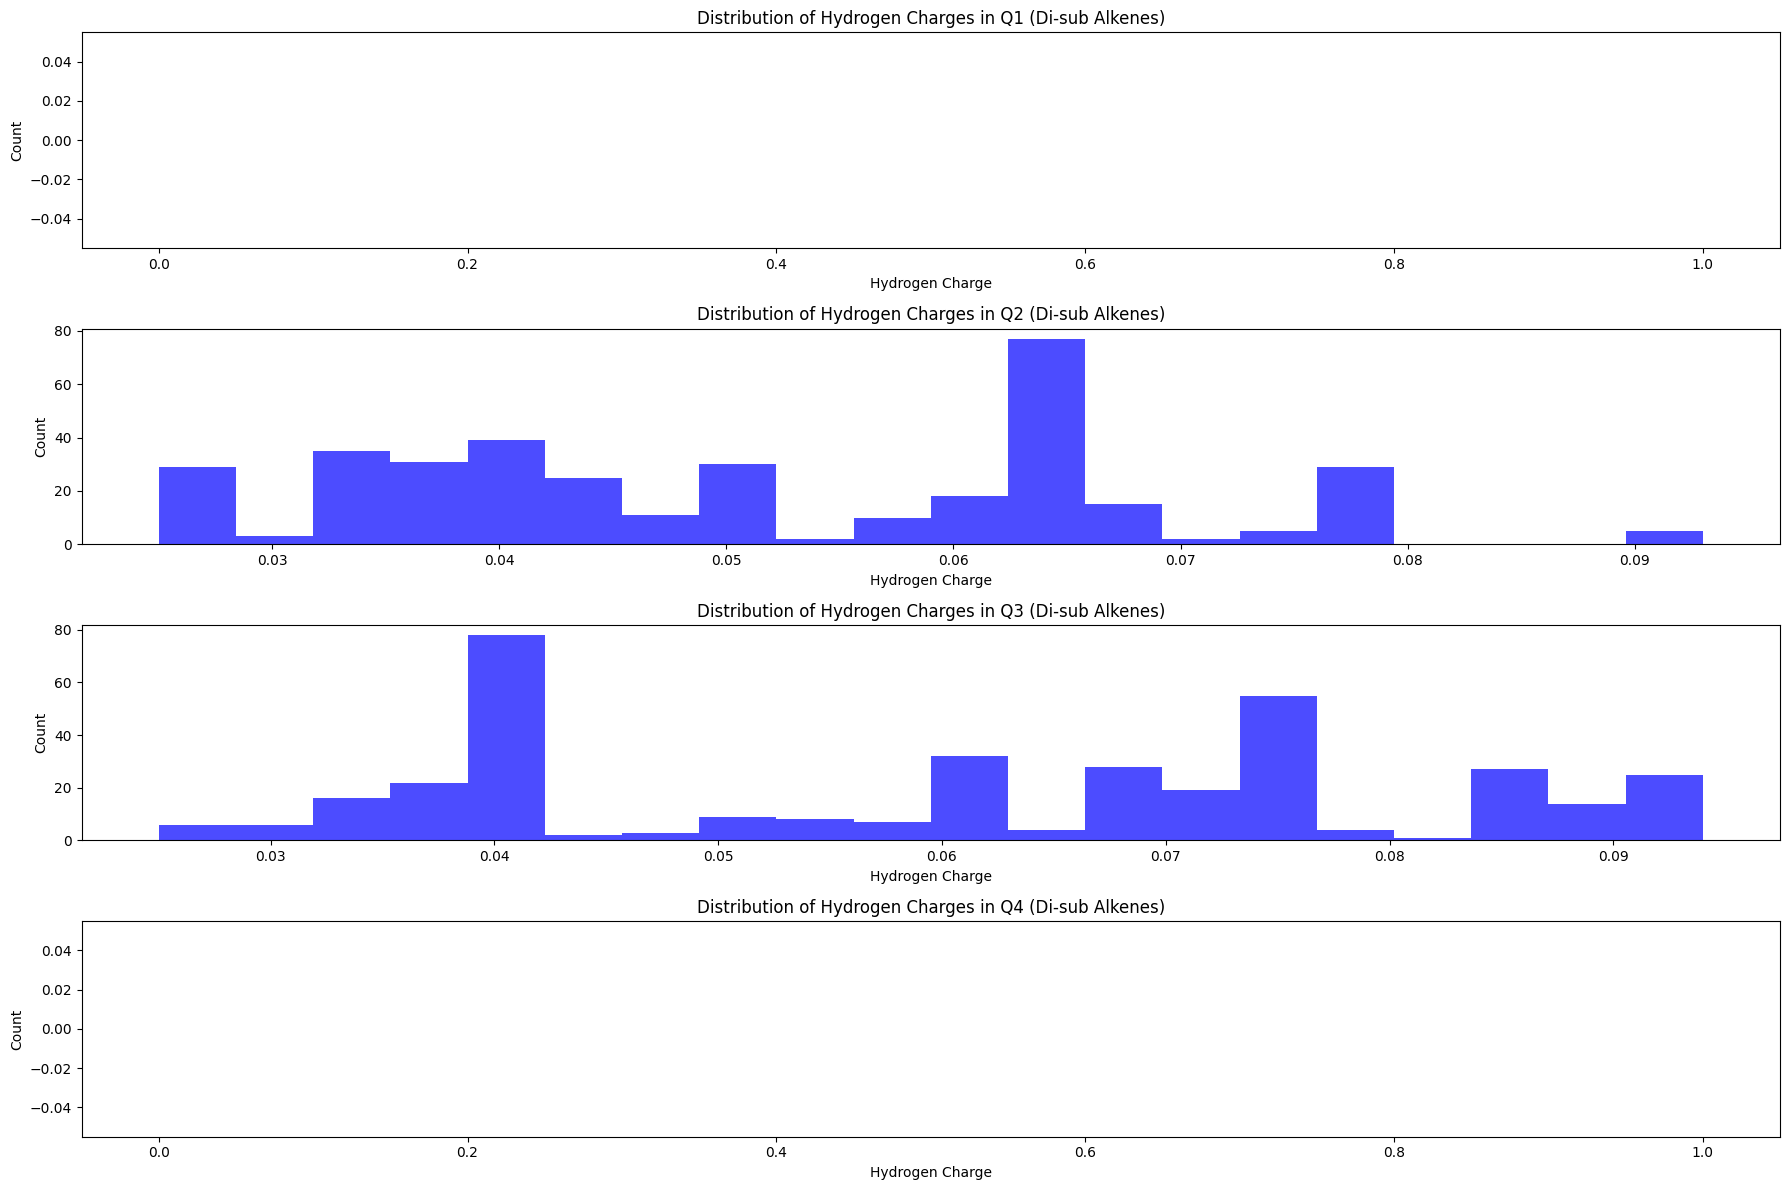

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel files
sterimol_df = pd.read_excel('sterimol_quadrant_values_hydrogen_only.xlsx')
charges_df = pd.read_excel('/Users/zhangjiayi/Desktop/Chem Research/molli/Practice/molecule_hydrogen_charges.xlsx')
type_df = pd.read_excel('/Users/zhangjiayi/Desktop/Chem Research/molli/Practice/machine_learning/reordered_final_merged_cleaned_qqm_molecule_charges.xlsx')

combined_df = pd.merge(sterimol_df, charges_df, on='Molecule')
combined_df = pd.merge(combined_df, type_df[['Reactant ID', '_Alkene_Type']], left_on='Molecule', right_on='Reactant ID')
di_sub_df = combined_df[combined_df['_Alkene_Type'] == 'Di-sub']

plt.figure(figsize=(18, 12))

quadrants = ['Q1', 'Q2', 'Q3', 'Q4']

for i, quadrant in enumerate(quadrants):
    plt.subplot(4, 1, i + 1)
    charge_data = di_sub_df[f'{quadrant}_H_charge'].dropna()
    
    plt.hist(charge_data, bins=20, alpha=0.7, color='blue')
    
    plt.title(f'Distribution of Hydrogen Charges in {quadrant} (Di-sub Alkenes)')
    plt.xlabel('Hydrogen Charge')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# for quadrant in quadrants:
#     charge_data = di_sub_df[f'{quadrant}_H_charge'].dropna()
#     print(f'{quadrant} charge data:', charge_data.head())

# print(di_sub_df.head())
# print(combined_df.head())
# print(combined_df.columns)


Distrubution of charge with the full sterimol descriptor 

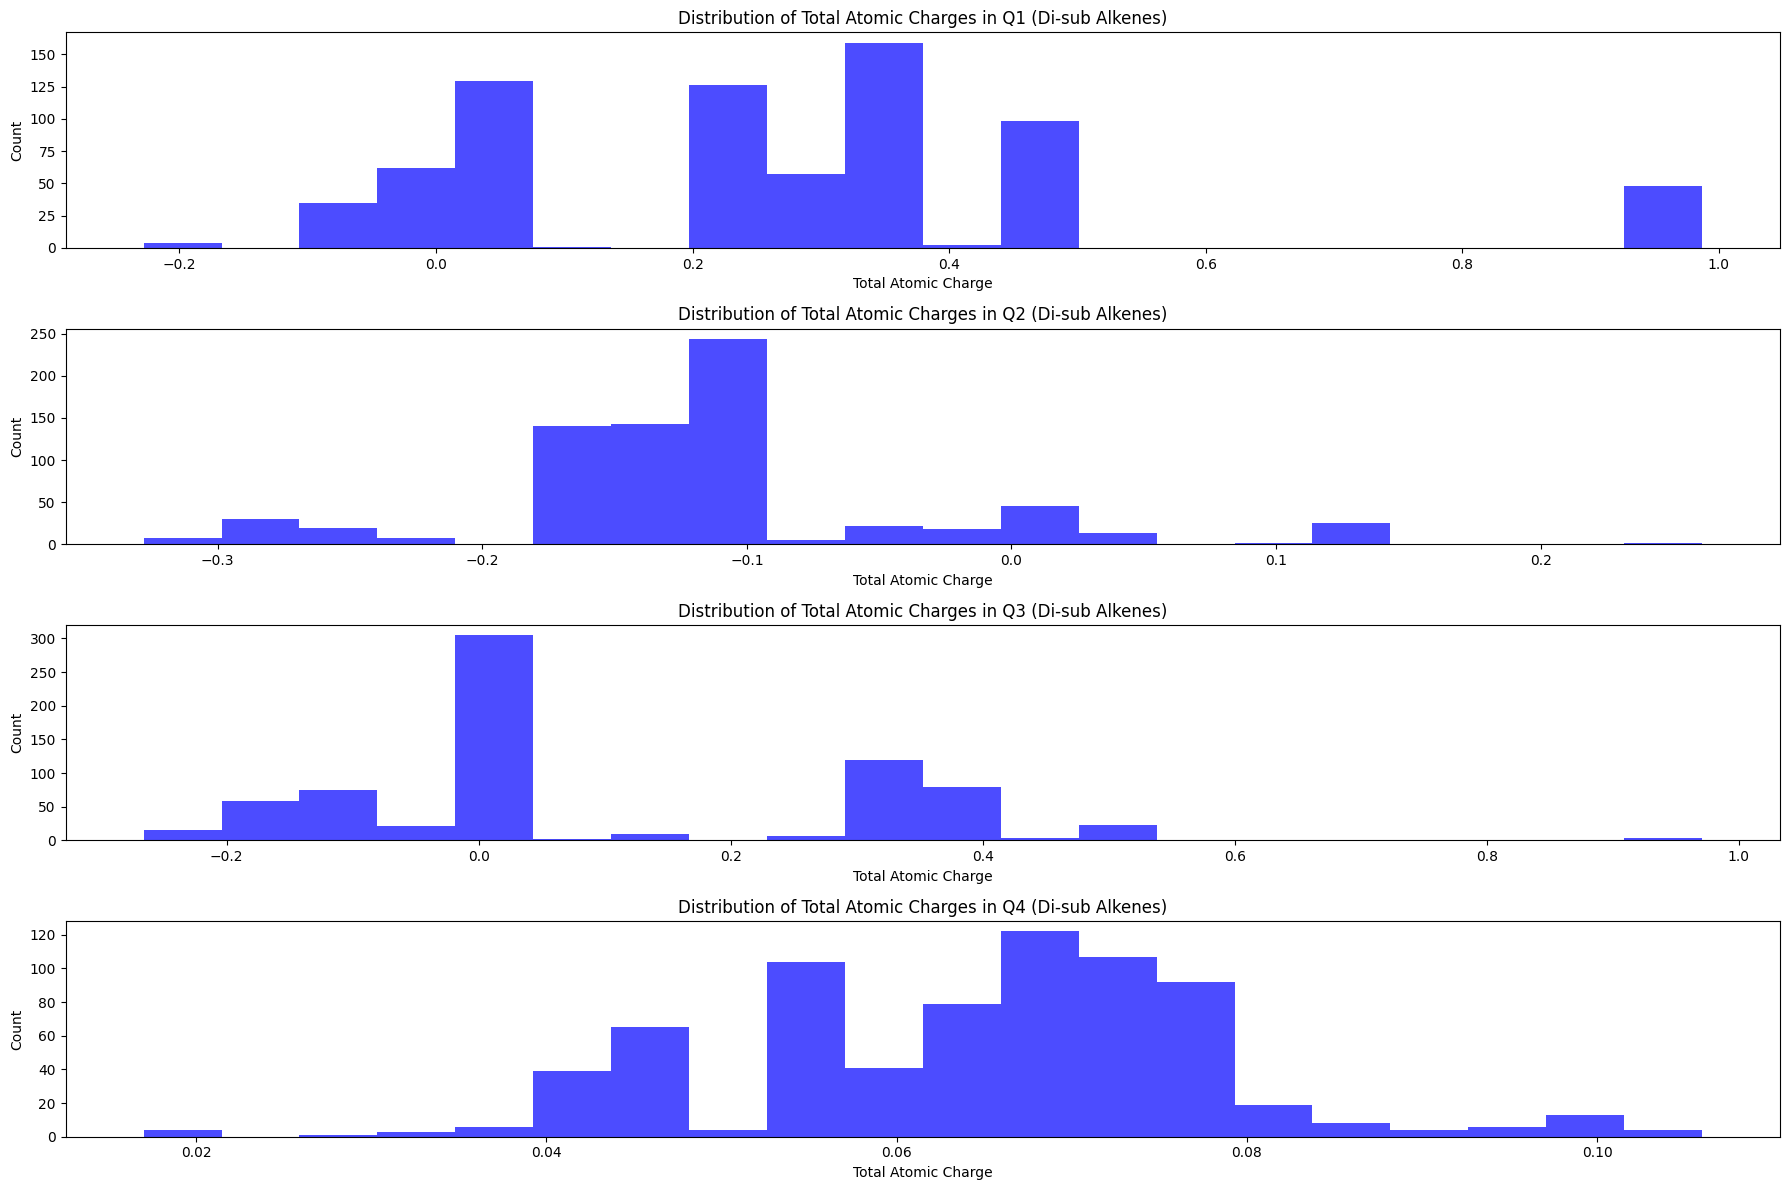

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the original dataset Excel files
sterimol_df = pd.read_excel('/Users/zhangjiayi/Desktop/Chem Research/molli/Practice/alkene/sterimol_quadrant_values.xlsx')
charges_df = pd.read_excel('/Users/zhangjiayi/Desktop/Chem Research/molli/Practice/alkene/molecule_charges.xlsx')
type_df = pd.read_excel('/Users/zhangjiayi/Desktop/Chem Research/molli/Practice/machine_learning/reordered_final_merged_cleaned_qqm_molecule_charges.xlsx')

# Merge the dataframes using 'Molecule ID' and 'Reactant ID'
combined_df = pd.merge(sterimol_df, charges_df, left_on='Molecule ID', right_on='Molecule')
combined_df = pd.merge(combined_df, type_df[['Reactant ID', '_Alkene_Type']], left_on='Molecule ID', right_on='Reactant ID')

# Filter the data for Di-substituted alkenes
di_sub_df = combined_df[combined_df['_Alkene_Type'] == 'Tri_Q4']

# Create plots for the dataset considering total atomic charges
plt.figure(figsize=(18, 12))

quadrants = ['Q1', 'Q2', 'Q3', 'Q4']

for i, quadrant in enumerate(quadrants):
    plt.subplot(4, 1, i + 1)
    charge_data = di_sub_df[f'{quadrant}_charge'].dropna()  # Using total charge columns
    
    plt.hist(charge_data, bins=20, alpha=0.7, color='blue')
    
    # Update title and labels to reflect total atomic charge distribution
    plt.title(f'Distribution of Total Atomic Charges in {quadrant} (Di-sub Alkenes)')
    plt.xlabel('Total Atomic Charge')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [37]:
import numpy as np

arr = np.array([-0.81650, -0.81650, 1.22474, -0.81650, 1.22474])

# Calculate the mean
mean = np.mean(arr)

# Calculate the standard deviation
std_dev = np.std(arr)

mean, std_dev

(-4.0000000000262045e-06, 0.999999288511747)